In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv(r'C:\Users\kevin\Desktop\VSCode\Zecser\data\kaggle\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [4]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
110700,110701,B00438XVGU,A2E94Q2HFK6SP0,"Sheathe ""sheathe""",2,2,4,1300665600,The best instant coffee out there,Don't let the baristas fool you: This is not a...
174242,174243,B000KHU6VG,A2SHQDMSR0MDAI,S. Flynn,0,0,5,1293408000,Delicious Decaf,I purchased this decaf espresso so I could enj...
90832,90833,B000FK7G20,AFGYFJPCP27F3,"GringoViejo49 ""GringoViejo49""",2,2,5,1265328000,"Consistently Good, great for adding to cooked ...",This product is of consistently good quality. ...
357100,357101,B001D228PY,A22CW0ZHY3NJH8,Noname,1,1,5,1242691200,Sturdy and attractive box,My son went to a birthday party where these po...
342633,342634,B003J9QGOI,A1CMGLBEZIWX2W,M. Le,2,2,5,1323907200,Real White Chocolate!,I had purchased these chips because I could no...


In [5]:
df.shape

(568454, 10)

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df[['Summary', 'Score']].head()

,Summary,Score
0,Good Quality Dog Food,5
1,Not as Advertised,1
2,"""Delight"" says it all",4
3,Cough Medicine,2
4,Great taffy,5


In [13]:
df[df['Score'] > 4]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [14]:
df[df['Score'] > 4][['ProfileName', 'Score']]

,ProfileName,Score
0,delmartian,5
4,"Michael D. Bigham ""M. Wassir""",5
6,David C. Sullivan,5
7,Pamela G. Williams,5
8,R. James,5
...,...,...
568448,James Braley,5
568449,Lettie D. Carter,5
568451,"pksd ""pk_007""",5
568452,"Kathy A. Welch ""katwel""",5


In [16]:
df[(df['Score'] > 4) & (df['HelpfulnessNumerator'] > 3)][['ProfileName', 'Score', 'HelpfulnessNumerator']].sample(5)

,ProfileName,Score,HelpfulnessNumerator
474229,Razorback61,5,4
194574,"E. M. Griffith ""auntleesie""",5,9
471438,"Elaine A. Craig ""YoMama""",5,7
117523,Victoria Satterfield,5,11
299383,Rachel,5,7


In [15]:
df.sort_values(by='Score', ascending=False).head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
338699,338700,B004Z4HUPA,A3KHFQBQ16Z03D,Bridgett Wilson,0,1,5,1345766400,Perfection,The forgot to mention 0 after taste... I notic...
338716,338717,B003UAQHOU,AIZWF6JVIZTC5,Tonya Artzer,1,1,5,1337990400,Hill Science Diet Dry Puppy Food,Have fed our Siberian Husky this food since sh...
338714,338715,B001VNFOZ6,A144UI9S7Z9MYA,Rachel Marie Zhao,3,3,5,1307923200,Excellent Chinese Five Spice,"''' For those who cook Chinese Chicken, Duck, ..."
338713,338714,B001VNFOZ6,A276OI0NHBYORX,Rebecca N,6,7,5,1300492800,"Great product, price, and well packaged",This is traditional 5 spice powder. The right...
338711,338712,B001VNFOZ6,A15P7Q1WK4RED0,Terri Fountain,6,6,5,1293667200,Love 5 Spice,This spice is so hard to find where I live. S...
338710,338711,B001VNFOZ6,A2ZE8BSZ5MMEOP,"Jasmine ""Uniquely Yours""",14,14,5,1261699200,"Delicious, fresh and convenient Five Spice powder","Frontier Five Spice Powder is a value, also, c..."
338709,338710,B002R83LW2,AJ7L4FL7XLT50,"J. Torres ""judeandjenny""",0,0,5,1294185600,Best home brew coffee!,As did another reviewer... I tried this coffee...
338708,338709,B002R83LW2,A3TTI1LVI0A7MS,Romeo,0,0,5,1305331200,Great Coffee,I found two of the finest resturants in my hom...
338707,338708,B002R83LW2,A25B0YK51CTBVN,boone1729,0,0,5,1313366400,Best Coffee Ever!!!,"I am not a coffee person, but I am in love wit..."


In [17]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [18]:
cols_to_drop = ['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary']
df.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [20]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [21]:
df.duplicated().sum()

174745

In [22]:
df['Text'].duplicated().sum()

174841

In [23]:
df.drop_duplicates(subset=['Text'], inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df['Text'].duplicated().sum()

0

In [26]:
df.isnull().sum()

Score    0
Text     0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393560 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   393560 non-null  int64 
 1   Text    393560 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.0+ MB


In [28]:
df.groupby('Score')['Text'].min()

Score
1    ! think I just ruined my dish. open this and p...
2    "6 Tins" arrived as 1 tin wrapped in paper and...
3    !!!<br />Animal digest? She does that on her o...
4    "... organic dark chocolate chips (organic sug...
5    !!HEY, these are BIG! There are actually two c...
Name: Text, dtype: object

<Axes: xlabel='Score', ylabel='Count'>

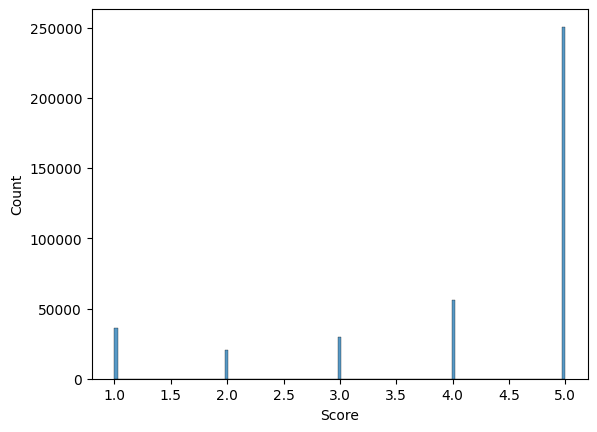

In [29]:
sns.histplot(df['Score'])

<Axes: xlabel='Score'>

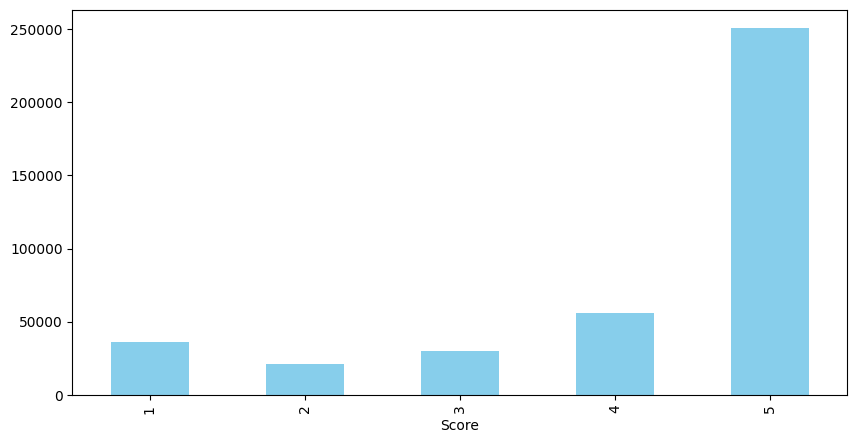

In [30]:
df['Score'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')

In [31]:
print(df['Score'].value_counts())

Score
5    250705
4     56041
1     36272
3     29752
2     20790
Name: count, dtype: int64


## Balanced Dataset

In [32]:
# target_count = df['Score'].value_counts().min()
target_count = 5000

balanced_df = (
    df.groupby('Score')
      .apply(lambda x: x.sample(n=target_count, random_state=42))
)

balanced_df.index = balanced_df.index.droplevel(0)

In [33]:
print(balanced_df['Score'].value_counts())

Score
1    5000
2    5000
3    5000
4    5000
5    5000
Name: count, dtype: int64


C:\Users\kevin\AppData\Local\Temp\ipykernel_24488\964187620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='Score', palette='viridis')


<Axes: xlabel='Score', ylabel='count'>

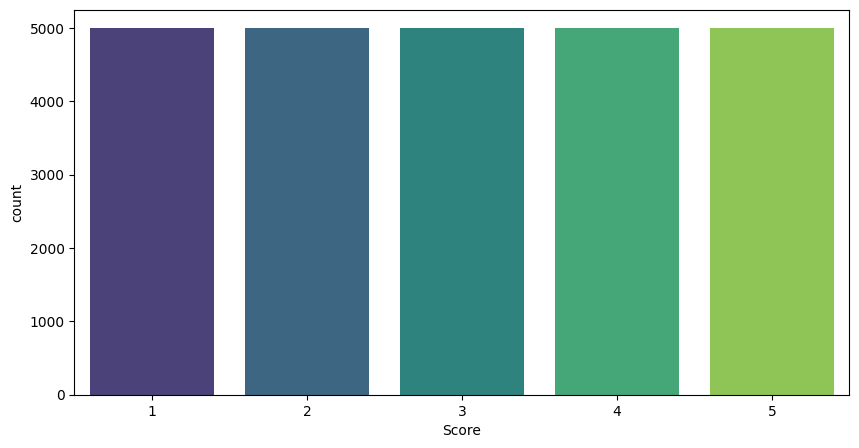

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(data=balanced_df, x='Score', palette='viridis')

In [35]:
balanced_df.head()

,Score,Text
188154,1,I used to purchase them at wholefoods market. ...
397500,1,Since the ingredient information is missing on...
564792,1,"Being a cinnamon candy nut at Valentines, I wa..."
538972,1,This has to be the world's smallest box of cho...
365392,1,This item can be purchased in stores for much ...


In [36]:
balanced_df.duplicated().sum()

0

In [37]:
balanced_df.isnull().sum()

Score    0
Text     0
dtype: int64

## Imbalanced Dataset

In [38]:
remaining_df = df.drop(balanced_df.index)

In [39]:
remaining_df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
4,5,Great taffy at a great price. There was a wid...
5,4,I got a wild hair for taffy and ordered this f...


In [40]:
imbalanced_total = 25000
distribution = {1: 0.10, 2: 0.15, 3: 0.25, 4: 0.30, 5: 0.20}
samples_per_score = {score: int(imbalanced_total * frac) for score, frac in distribution.items()}

In [ ]:
imbalanced_df_list = []
for score, n_samples in samples_per_score.items():
    subset = remaining_df[remaining_df['Score'] == score]
    available = len(subset)
    if available < n_samples:
        print(f"Not enough reviews for Score = {score}. Available: {available}, Needed: {n_samples}")
        n_samples = available
    sampled = subset.sample(n=n_samples, random_state=42)
    imbalanced_df_list.append(sampled)

imbalanced_df = pd.concat(imbalanced_df_list)

In [42]:
print(imbalanced_df['Score'].value_counts())

Score
4    7500
3    6250
5    5000
2    3750
1    2500
Name: count, dtype: int64


C:\Users\kevin\AppData\Local\Temp\ipykernel_24488\1983844408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=imbalanced_df, x='Score', palette='viridis')


<Axes: xlabel='Score', ylabel='count'>

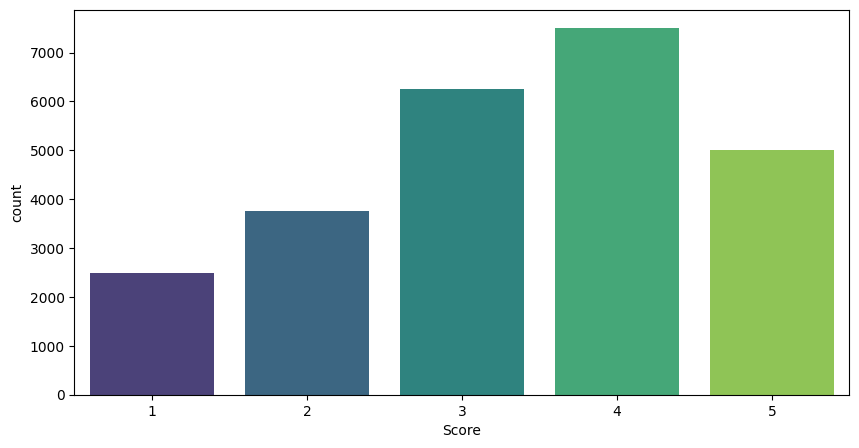

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(data=imbalanced_df, x='Score', palette='viridis')

In [44]:
imbalanced_df.head()

,Score,Text
465905,1,A no star rating. The worst purchase ever from...
128014,1,Do not buy this product! Lousy!!! The inner ...
495906,1,I got this as a gift from Amazon from my siste...
86129,1,If you like your popcorn with a bit of salt as...
519161,1,"I have been eating ""breakfast bars"" for at lea..."


In [45]:
imbalanced_df.isnull().sum()

Score    0
Text     0
dtype: int64

In [46]:
imbalanced_df.duplicated().sum()

0

In [47]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [48]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [49]:
def preprocess(text):

    text = text.lower()     #Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)     # Remove URLs     
    text = re.sub(r'<.*?>', ' ', text)   # Remove HTML tags
    text = re.sub(r'\d+', '', text)     # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))    # Remove punctuation
    tokens = word_tokenize(text)    # Tokenize the text
    clean_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words and len(token) > 2
    ]       # Remove stopwords and short tokens

    return ' '.join(clean_tokens)

In [50]:
balanced_df['Cleaned_Text'] = balanced_df['Text'].apply(preprocess)
imbalanced_df['Cleaned_Text'] = imbalanced_df['Text'].apply(preprocess)

In [51]:
balanced_df.isnull().sum()

Score           0
Text            0
Cleaned_Text    0
dtype: int64

In [52]:
imbalanced_df.isnull().sum()

Score           0
Text            0
Cleaned_Text    0
dtype: int64

In [53]:
balanced_df.duplicated().sum()

0

In [54]:
imbalanced_df.duplicated().sum()

0

In [55]:
balanced_df.head()

,Score,Text,Cleaned_Text
188154,1,I used to purchase them at wholefoods market. ...,used purchase wholefoods market bought pack gr...
397500,1,Since the ingredient information is missing on...,since ingredient information missing amazoncom...
564792,1,"Being a cinnamon candy nut at Valentines, I wa...",cinnamon candy nut valentine pretty excited le...
538972,1,This has to be the world's smallest box of cho...,world smallest box chocolate even advertised l...
365392,1,This item can be purchased in stores for much ...,item purchased store much le weight listedonly...


In [56]:
imbalanced_df.head()

,Score,Text,Cleaned_Text
465905,1,A no star rating. The worst purchase ever from...,star rating worst purchase ever amazon doubt r...
128014,1,Do not buy this product! Lousy!!! The inner ...,buy product lousy inner wrapper come product s...
495906,1,I got this as a gift from Amazon from my siste...,got gift amazon sister big disappointment poor...
86129,1,If you like your popcorn with a bit of salt as...,like popcorn bit salt avoid product trust full...
519161,1,"I have been eating ""breakfast bars"" for at lea...",eating breakfast bar least year ive enjoyed va...


In [57]:
# Save balanced dataset
balanced_path = r'C:\Users\kevin\Desktop\VSCode\Zecser\data\balanced_dataset'
os.makedirs(balanced_path, exist_ok=True)
if not os.path.exists(os.path.join(balanced_path, 'Balanced_Reviews.csv')):
    balanced_df.to_csv(os.path.join(balanced_path, 'Balanced_Reviews.csv'), index=False)
    print("Balanced dataset saved successfully.")

Balanced dataset saved successfully.


In [58]:
# Save imbalanced dataset
imbalanced_path = r'C:\Users\kevin\Desktop\VSCode\Zecser\data\imbalanced_dataset'
os.makedirs(imbalanced_path, exist_ok=True)
if not os.path.exists(os.path.join(imbalanced_path, 'Imbalanced_Reviews.csv')):
    imbalanced_df.to_csv(os.path.join(imbalanced_path, 'Imbalanced_Reviews.csv'), index=False)
    print("Imbalanced dataset saved successfully.")

Imbalanced dataset saved successfully.
